# Performance Metrics

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

## Load & Plot Data

In [2]:
# Read in the daily data
data_path = Path("../Resources/GOOG_implied_vol.csv")
ohlcv_df = pd.read_csv(
    data_path,
    index_col="date",
    infer_datetime_format=True,
    parse_dates=True
)

# Display sample data
ohlcv_df.head()

open      high       low     close   average
date                                                        
2014-04-04  0.304791  0.349954  0.297853  0.345731  0.349954
2014-04-07  0.350160  0.373892  0.344413  0.354271  0.373892
2014-04-08  0.346175  0.352271  0.335063  0.336444  0.352271
2014-04-09  0.332714  0.343556  0.331396  0.338429  0.343556
2014-04-10  0.393561  0.405006  0.385878  0.387147  0.405006

<AxesSubplot:xlabel='date'>

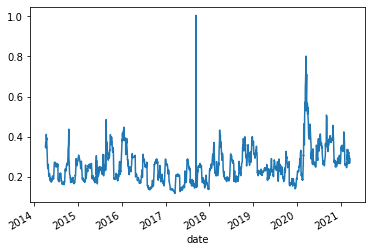

In [3]:
# Plot the data
ohlcv_df["average"].plot()

## Calculate Returns

In [4]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:, ["average"]]

# Calculate percentage change in implied volatility 
# (Implied Volatility is a proxy for option price returns) 
signals_df["Actual Returns"] = ( signals_df["average"].pct_change())
signals_df["Actual Returns"].head()

date
2014-04-04         NaN
2014-04-07    0.068406
2014-04-08   -0.057827
2014-04-09   -0.024740
2014-04-10    0.178865
Name: Actual Returns, dtype: float64

In [5]:
# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Display sample data
signals_df.head()

average  Actual Returns
date                                
2014-04-07  0.373892        0.068406
2014-04-08  0.352271       -0.057827
2014-04-09  0.343556       -0.024740
2014-04-10  0.405006        0.178865
2014-04-11  0.411610        0.016305

## Build a Simple Trading Algorithm

### Define a Simple Momentum Strategy

In [6]:
# Initialize the new Signal column
signals_df["Signal"] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df["Actual Returns"] >= 0), "Signal"] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df["Actual Returns"] < 0), "Signal"] = -1

### Risk and Performance

In [7]:
# Annualized volatility of the option returns for Google


# Display results


Annualized Volatility: 240.25 %


In [8]:
# Calculate the strategy returns and add them to the signals_df DataFrame


<AxesSubplot:xlabel='date'>

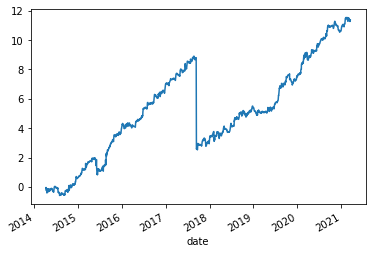

In [9]:
# Calculate the strategy's returns


# Plot Strategy Returns to examine performance


## Add Transaction Costs to a Backtest

In [10]:
# Every time we change from long to short, or vice-versa, 2 trades occur


# Display sample data


average  Actual Returns  Signal  Strategy Returns  Trades
date                                                                  
2014-04-07  0.373892        0.068406     1.0               NaN     NaN
2014-04-08  0.352271       -0.057827    -1.0         -0.057827     2.0
2014-04-09  0.343556       -0.024740    -1.0          0.024740     0.0
2014-04-10  0.405006        0.178865     1.0         -0.178865     2.0
2014-04-11  0.411610        0.016305     1.0          0.016305     0.0

In [11]:
# Calculate total daily trade costs


# Display sample data


date
2014-04-07     NaN
2014-04-08    0.01
2014-04-09    0.00
2014-04-10    0.01
2014-04-11    0.00
Name: Trades, dtype: float64

In [12]:
# Calculate strategy returns after costs

### Plot the stragegy returns before and after costs

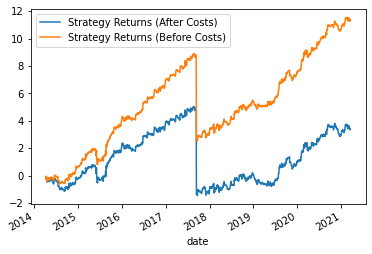

In [13]:
# Compute total strategy returns after costs

# Plot stategy returns before and after costs


## Other Performance Metrics

### Sharpe Ratio

In [14]:
# Calculate Sharpe Ratio

# Display results


Sharpe Ratio: 0.688


### Best-Case/Worst-Case Weekly Performance

<AxesSubplot:xlabel='date'>

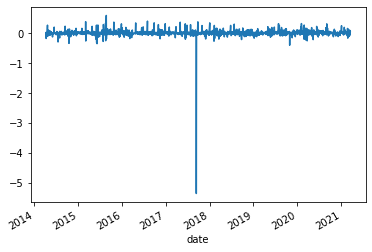

In [15]:
signals_df["Strategy Returns"].plot()

In [16]:
# Calculate weekly returns


# Display results    


year  week
2014  15     -0.195647
      16     -0.206601
      17      0.228056
      18      0.026974
      19     -0.118755
                ...   
2021  7      -0.050611
      8      -0.178928
      9       0.177713
      10     -0.151651
      11      0.052924
Name: Strategy Returns, Length: 362, dtype: float64

In [17]:
# Fetch descriptive statistics

count    362.000000
mean       0.031375
std        0.363875
min       -6.149959
25%       -0.048882
50%        0.027718
75%        0.128431
max        0.611968
Name: Strategy Returns, dtype: float64

<AxesSubplot:xlabel='year,week'>

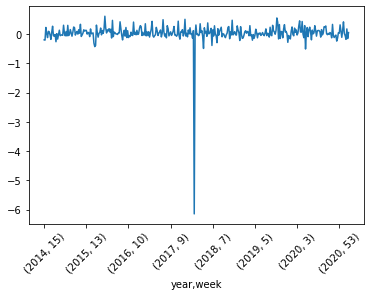

In [18]:
# Plot weekly returns